# Ford GoBike Dataset Exploration
#### by Can PERÇİN

## 1.Introduction
In this project, data visualization which is the final chapter in Udacity Data Analysis Nanodegree course will be demonstrated by using different techniques such as Univariate, Bivariate, Multivariate.

Ford GoBike is a bike sharing system and "201902-fordgobike-tripdata" will be used as the master data table in this project. Wrangling and explorating this data is going to be shown systematically in this section. After completing the exploration part, a presentation will be shown by using the outputs of exploration part.

## 2.Preliminary Wrangling


* Importing all packages and setting plots to be embedded inline

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import datetime
%matplotlib inline

* Creating a master dataframe and copying it into a sub dataframe for further explorations.

In [2]:
master_df = pd.read_csv("201902-fordgobike-tripdata.csv")
df = master_df

In [3]:
# checking the size of our dataframe
df.shape

(183412, 16)

There are 183.411 row (bike trip) and 16 columns.

* Lets check these column names and store them in a dataframe.

In [4]:
column_names = df.columns
column_names

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

* Checking the tidiness of our dataset. Exploring the feautures of bike trips.

In [5]:
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


* Checking the data quality.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


* Data tidiness is looking good; however there are some quality issues.

    ***Quality issues***
    
    **1.** *"start_time" and "End_time" have wrong data types.*
       
    **2.** *"bike_id", "start_station_id" and "end_station_id" have wrong datatypes(float). These should be string.*
    
    **3.** *"user_type", "gender" and "bike_share_for_all_trip" have wrong datatype(str). These should be categorical.*
    
    **4.** *Age column should be created by considering birth dates.*
    
    **5.** *There are some bike ride data that have higher than 70 years old and null values in member_age column. These should be dropped to prevent outliers in our visualizations. At the end we can convert "member_age" column's datatype into int64.* 
    
    **6.** *We should subdivide start_time into day,month and year columns.*
    
    
* *1-3 issues generally happen after saving dataframe as csv and identifying it as a new dataframe to a new project.*

## 3.Cleaning Data 

#### Define
* "start_time" and "End_time" have wrong data types. Change these to datetime.

#### Code

In [8]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

#### Test

In [9]:
print("start_time is",df.start_time.dtypes)
print("end_time is",df.end_time.dtypes)

start_time is datetime64[ns]
end_time is datetime64[ns]


#### Define
* "bike_id","start_station_id" and "end_station_id" have wrong datatype float instead of string. Change it to string datatype.

#### Code

In [10]:
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')
df.bike_id = df.bike_id.astype('str')

#### Test

In [11]:
print("start_station_id is",df.start_station_id.dtypes)
print("end_station_id is",df.end_station_id.dtypes)
print("bike_id is",df.bike_id.dtypes)

start_station_id is object
end_station_id is object
bike_id is object


#### Define
* "user_type", "member_gender" and "bike_share_for_all_trip" have wrong datatype(str). These should be categorical.

#### Code

In [12]:
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

#### Test

In [13]:
print("user_type is",df.user_type.dtypes)
print("member_gender is",df.member_gender.dtypes)
print("bike_share_for_all_trip is",df.bike_share_for_all_trip.dtypes)

user_type is category
member_gender is category
bike_share_for_all_trip is category


#### Define
* Age column should be created by considering birth dates.

#### Code

In [14]:
# Dataset is from 2019. It would be a misdirection if we would use actual ages in 2022.

df['member_age'] = 2019-df.member_birth_year

#### Test

In [15]:
df.member_age.sample(10)

11524     37.0
39054     65.0
8062      56.0
45112     21.0
44012     33.0
165600    30.0
47916     43.0
178723    26.0
101523    35.0
63237     30.0
Name: member_age, dtype: float64

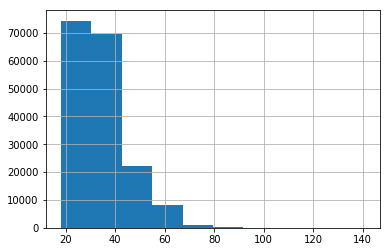

In [16]:
df.member_age.hist();

#### Define
* There are some bike ride data that have higher than 70 years old and null values in member_age column. These should be dropped to prevent outliers in our visualizations.

In [17]:
df.member_age.max()

141.0

#### Code

In [18]:
df = df.query('member_age < 70')
df.member_age = df.member_age.astype('int64')

#### Test

In [19]:
df.member_age.max()

69

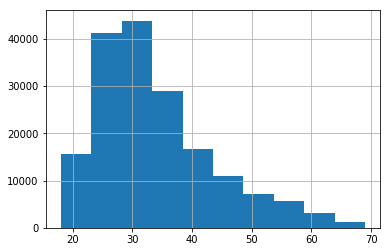

In [20]:
df.member_age.hist();

#### Define
* We should subdivide "start_time" column into day,month and year columns.

#### Code

In [21]:
df['s_day'] = df['start_time'].dt.day
df['s_hour']=df['start_time'].dt.hour
df['s_month'] = df['start_time'].dt.month
df['s_year'] = df['start_time'].dt.year
df['s_weekday_name']=df['start_time'].dt.strftime('%a')
df['s_month_name']=df['start_time'].dt.strftime('%B')

#### Test

In [22]:
print("s_hour is",df.s_hour.dtypes)
print("s_day is",df.s_day.dtypes)
print("s_month is",df.s_month.dtypes)
print("s_year is",df.s_year.dtypes)
print("s_weekday_name is",df.s_weekday_name.dtypes)
print("s_month_name is",df.s_month_name.dtypes)

s_hour is int64
s_day is int64
s_month is int64
s_year is int64
s_weekday_name is object
s_month_name is object


### What is the structure of the dataset?

*There are 183.411 bike trips in this dataframe.*

### What is/are the main feature(s) of interest in the dataset?

**1.** *What are the hours/weekdays with the most GoBike usage?*
 
**2.** *Which stations are used frequently?*
 
**3.** *What is the difference between subscibers and daily customers depend on their usage?*
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**"user_type",**

**"end_station"**,

**"start_station"**,

**"start_time",** properties,

**"duration_sec"**

## 4.Univariate Exploration

* **What is the general distribution in our data?**

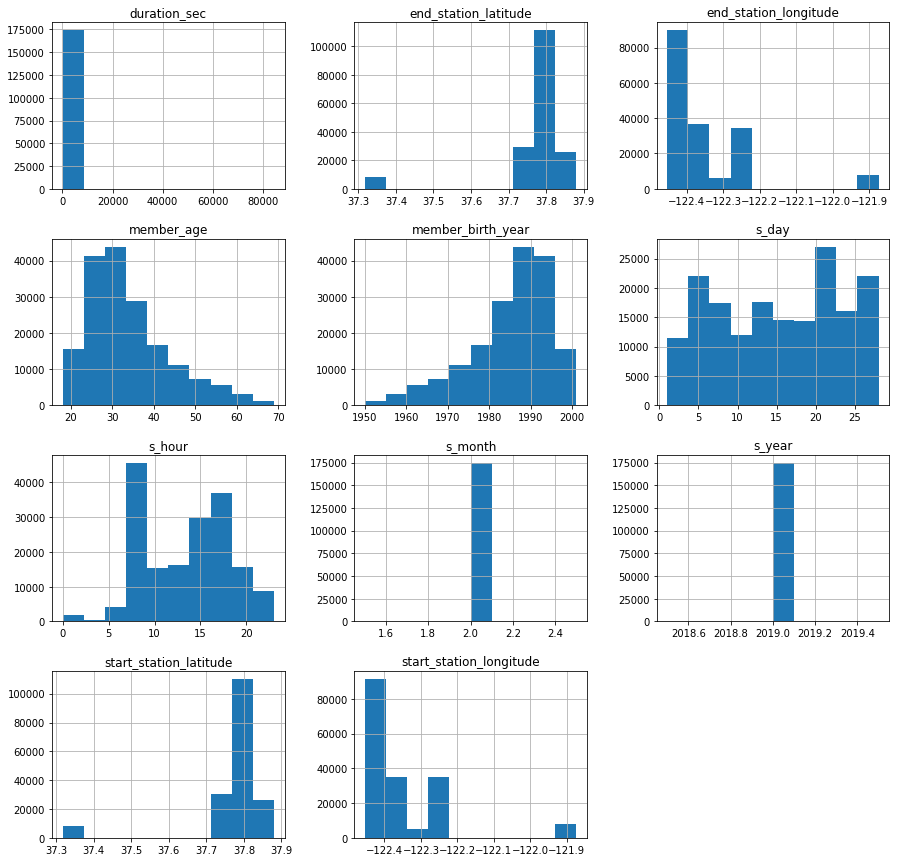

In [23]:
df.hist(figsize=(15,15));


* *The dataframe consist of February 2019 bike trips.*
* *Highest bike trips start time is between 06:00 and 8:00 AM.*

In [24]:
# Defining a function to decrease reputations in the code
def graph_properties(Labelx, Labely, title):
        plt.title(title)
        plt.xlabel(Labelx)
        plt.ylabel(Labely)

* **What are age, gender and subscription distributions of users?**

Mean age is: 34.0153318852
Highest age is: 69
Lowest age is: 18


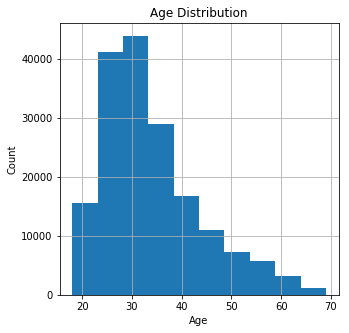

In [25]:
# Changing the font size
plt.rcParams['font.size'] = 10

# Labeling the figure
graph_properties("Age","Count","Age Distribution")

# Changing figure size
df.member_age.hist(figsize= (5,5));

# Printing out some valuable information
print("Mean age is:", df.member_age.mean())
print("Highest age is:", df.member_age.max())
print("Lowest age is:", df.member_age.min());

* *Age distribution is skewed to right. The mean is 34 , highest age is 69 and the lowest age is 18.*

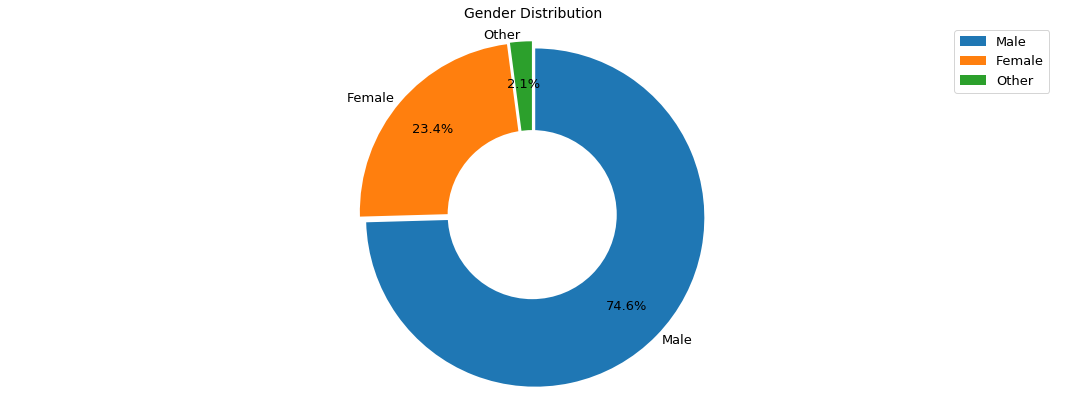

In [26]:
# Defining a dataframe for visualization
df_gender = df.member_gender.value_counts()

# Creating labels
labels = df.member_gender.value_counts().index[:3]

# Choosing colors for pie chart
colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]

# Adjusting the figure size
fig1, ax1 = plt.subplots(figsize=(15,6))

# Adjusting font size
plt.rcParams['font.size'] = 13

# Defining exlode values for a better visualization
explode = (0.03 , 0.03 , 0.03)

# plotting the graph
ax1.pie(df_gender, labels = labels, labeldistance=1.04, explode=explode, startangle = 90, counterclock = False, 
        radius=1.2, pctdistance=0.75, autopct='%1.1f%%',rotatelabels=False, colors = colors)

# Creating a white circle in the middle of the chart for a better visualization
centre_circle = plt.Circle((0,0),0.6,fc='white')

# Preventing chart to be shown as an elips instead of circle
ax1.axis('equal')

# Graph properties defined
plt.title("Gender Distribution", fontsize = 14)

# Legend created
ax1.legend(labels, loc = "upper right")

# Adjusting the figure and presenting the last version.
plt.tight_layout() 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show();

* *%74.6 of bike riders are Male and %23.4 Female according to the data. There are %2.1 users without any gender information and it is labeled as "other".*

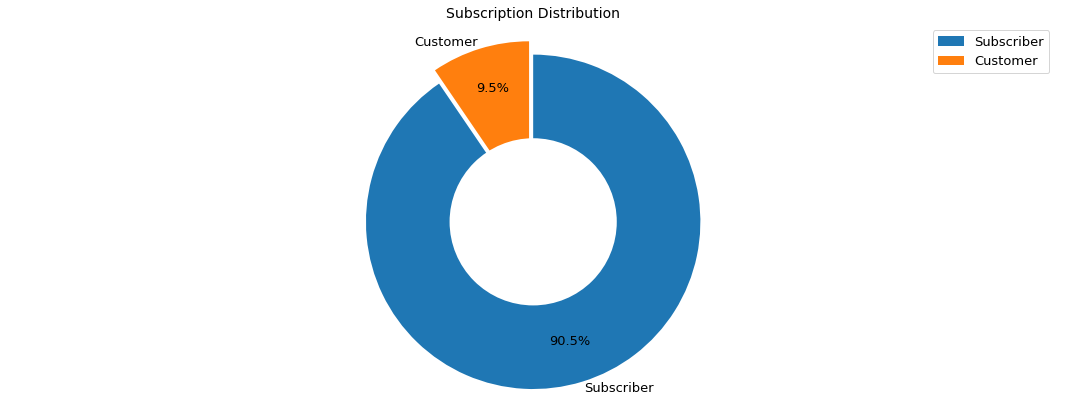

In [27]:
# Defining the dataframe
df_utype = df.user_type.value_counts()

# Defining labels
labels = df.user_type.value_counts().index[:2]

# Creating a figure and adjusting its size
fig1, ax1 = plt.subplots(figsize=(15,6))

# Adjusting the font size
plt.rcParams['font.size'] = 13

# explode parameters defined for a better visualization
explode = (0, 0.1)

# Pie Chart is created
ax1.pie(df_utype, labels = labels, labeldistance=1.04, explode=explode, startangle = 90, counterclock = False, 
        radius=1.2, pctdistance=0.75, autopct='%1.1f%%',rotatelabels=False)

# White circle is presented in the middle of the pie chart for a better visualization.
centre_circle = plt.Circle((0,0),0.6,fc='white')

# Smoothing labels and figure shape.
ax1.axis('equal')
plt.title("Subscription Distribution", fontsize = 14)
ax1.legend(labels, loc = "upper right")
plt.tight_layout() 
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

* *%90.5 of the bike riders in February 2019 were subscriber.*

* **What are the hours/weekdays with the most GoBike usage?**

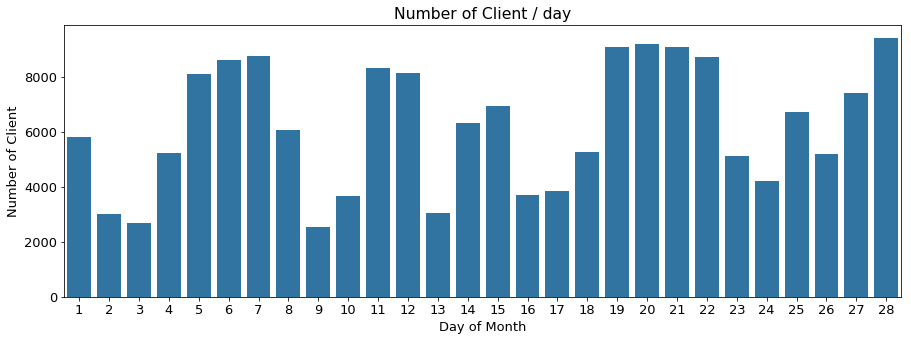

In [28]:
# Defining the color
palette = sb.color_palette()[0]
color = [palette]

# Adjusting the figure and font sizes
rcParams['figure.figsize'] = 15,5
plt.rcParams['font.size'] = 13

# Plotting and smoothing the labels
sb.countplot(data=df , x='s_day',palette=color)
plt.xticks(rotation=0)
graph_properties("Day of Month","Number of Client","Number of Client / day");

* *Feb 2-3, 9-10, 16-17 and 23-24 has the lowest bike rides over the 4 weeks. These days are on weekends.*

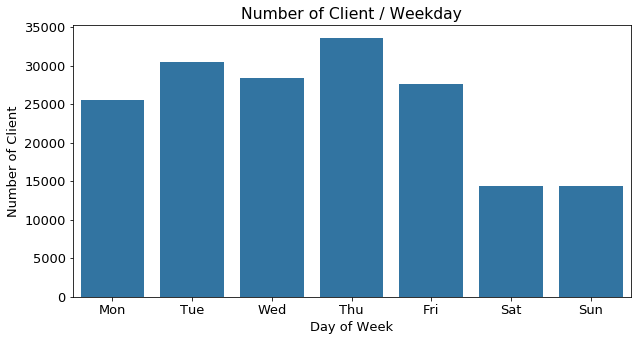

In [29]:
# Defining colors
palette = sb.color_palette()[0]
color = [palette]

# Creating an order for labeling
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Figure and font sizes are adjusted
rcParams['figure.figsize'] = 10,5
plt.rcParams['font.size'] = 13

# Ploting and smoothing the labels
sb.countplot(data=df , x='s_weekday_name', palette = color, order = order)
plt.xticks(rotation=0)
graph_properties("Day of Week","Number of Client","Number of Client / Weekday");

* *This graph also supports that lowest bike usage were on Saturdays and Sundays. The highest usages in February were on Thursdays.*

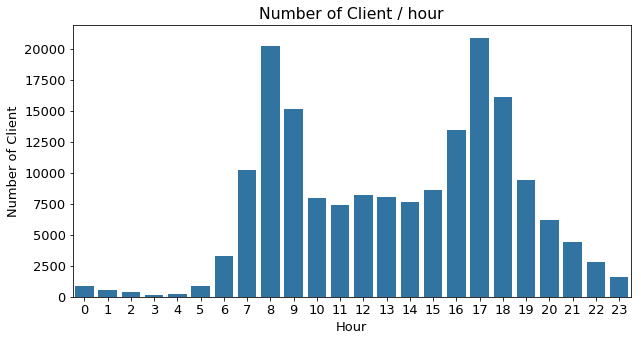

In [30]:
# Defining the color of the graph
palette = sb.color_palette()[0]
color = [palette]

# Defining figure size
rcParams['figure.figsize'] = 10,5

# Plotting and smoothing the graph
sb.countplot(data=df , x='s_hour', palette = color)
plt.rcParams['font.size'] = 13
plt.xticks(rotation=0)
graph_properties("Hour","Number of Client","Number of Client / hour");

* *Highest usage hours were between 7-9 AM and 16-18 PM in February 2019.*

* **Which stations are used frequently?**

In [31]:
# Getting the top 10 bike trip start stations
top10stations = df['start_station_name'].value_counts().index[:10]
top10df = df.loc[df['start_station_name'].isin(top10stations)]

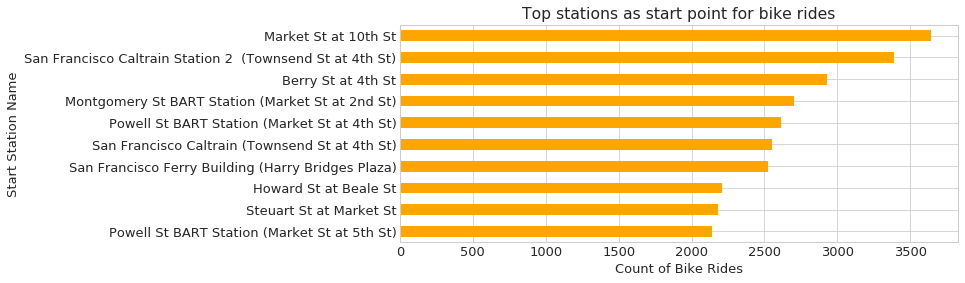

In [32]:
# Adjusting figure size and creating an empty figure
plt.figure(figsize=(10,4))

# Choosing the seaborn theme for a better visualization.
sb.set_style('whitegrid')

# Adjusting the fontsize
plt.rcParams['font.size'] = 13

# Plotting and smoothing the graph labels
top10df['start_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='orange')
graph_properties("Count of Bike Rides","Start Station Name","Top stations as start point for bike rides");

* *Top 10 stations are shown above. Mostly used start station is at **Market St at 10th St**.*

In [33]:
# Top 10 bike ride start points defined
sorted_counts = df['start_station_name'].value_counts()
top10 = sorted_counts.head(10)
top10 = pd.DataFrame(top10)
top10

,start_station_name
Market St at 10th St,3644
San Francisco Caltrain Station 2 (Townsend St at 4th St),3385
Berry St at 4th St,2931
Montgomery St BART Station (Market St at 2nd St),2705
Powell St BART Station (Market St at 4th St),2611
San Francisco Caltrain (Townsend St at 4th St),2552
San Francisco Ferry Building (Harry Bridges Plaza),2525
Howard St at Beale St,2210
Steuart St at Market St,2181
Powell St BART Station (Market St at 5th St),2141


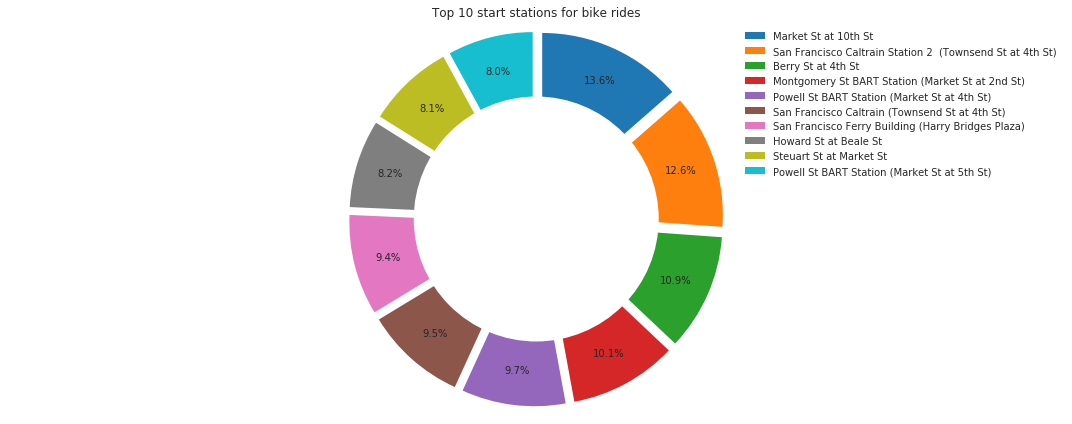

In [34]:
# x values are defined
size = [3644,3385,2931,2705,2611,2552,2525,2210,2181,2141]

# explode parameters are defined for a better visualization
explode =(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

# labels defined
labels = top10.index

# Adjusting the figure size
fig, ax1 = plt.subplots(figsize = (15,6))

# Adjusting the font size
plt.rcParams['font.size'] = 10

# Creating the chart
ax1.pie(size, explode=explode, startangle = 90, counterclock = False, radius=1.2, pctdistance=0.80, autopct='%1.1f%%');

# Creating a white circle to show the chart as a hollow for a better visualization
centre_circle = plt.Circle((0,0),0.85,fc='white')

# Plotting labels, legends and adjusting the pie chart
ax1.axis("equal")
plt.title("Top 10 start stations for bike rides", fontsize = 12)
ax1.legend(labels, loc = "upper right")
plt.tight_layout() 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Top10start.png");

* *The pie chart of top 10 start stations for bike rides presented above. **%13.6** of bike rides in top 10 start stations were at **Market St at 10th St**.*

In [35]:
# Top 10 bike ride end points defined
sorted_counts = df['end_station_name'].value_counts()
top10end = sorted_counts.head(10)
top10end = pd.DataFrame(top10end)
top10end

,end_station_name
San Francisco Caltrain Station 2 (Townsend St at 4th St),4619
Market St at 10th St,3701
Montgomery St BART Station (Market St at 2nd St),3449
San Francisco Ferry Building (Harry Bridges Plaza),3142
Powell St BART Station (Market St at 4th St),2849
San Francisco Caltrain (Townsend St at 4th St),2837
Berry St at 4th St,2752
The Embarcadero at Sansome St,2341
Steuart St at Market St,2263
Powell St BART Station (Market St at 5th St),2152


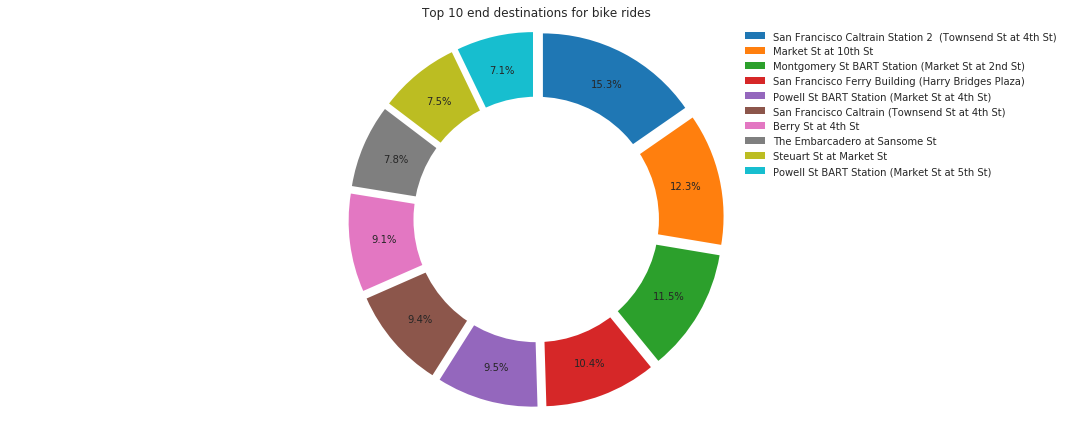

In [36]:
# x values are defined
size =[4619, 3701,3449, 3142, 2849, 2837, 2752, 2341, 2263, 2152]

# explode parameters are defined for a better visualization
explode =(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

# labels defined
labels = top10end.index

# Adjusting the figure size
fig, ax1 = plt.subplots(figsize = (15,6))

# Adjusting the font size
plt.rcParams['font.size'] = 10

# Creating the chart
ax1.pie(size, explode=explode, startangle = 90, counterclock = False, radius=1.2, pctdistance=0.80, autopct='%1.1f%%');

# Creating a white circle to show the chart as a hollow for a better visualization
centre_circle = plt.Circle((0,0),0.85,fc='white')

# Plotting labels, legends and adjusting the pie chart
ax1.axis("equal")
plt.title("Top 10 end destinations for bike rides", fontsize = 12)
ax1.legend(labels, loc = "upper right")
plt.tight_layout() 
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Top10end.png");

* *The pie chart of top 10 end stations for bike rides presented above. **%15.53** of bike rides in top 10 end stations were at **San Francisco Caltrain Station 2 (Townsend St at 4th St)**.*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the most used stations part, I have to create top 10 stations for both start station and end station. Because of the station number, graphes were getting crashed.
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were outliers in the age data. Before the start of the univariate exploration, I remove these outliers to prevent the weird visualizations on graphes.

> There is a 3rd category for gender distribution. However, I didn't want to remove this category. There will be always people that won't share such specific information and %2 shouldn't be underestimated in datasets. So I decided to use it as three categories in further explorations.

## 5.Bivariate Exploration

* **What is the relationship between gender and subscription?**

Male Subscribers: 118572
Female Subscribers: 36127
Female Subscribers: 3171
Subscriber Rates: M: 0.7510736682080192 F: 0.22884018496231076 O: 0.02008614682966998

Male Customer: 11505
Female Customer: 4645
Female Subscribers: 453
Customer Rates: M: 0.6929470577606457 F: 0.2797687164970186 O: 0.027284225742335723

Subscription Count/Gender: M: 0.9115523882008348 F: 0.8860737761208672
Customer Count/Gender: M: 0.0884476117991651 F: 0.11392622387913273


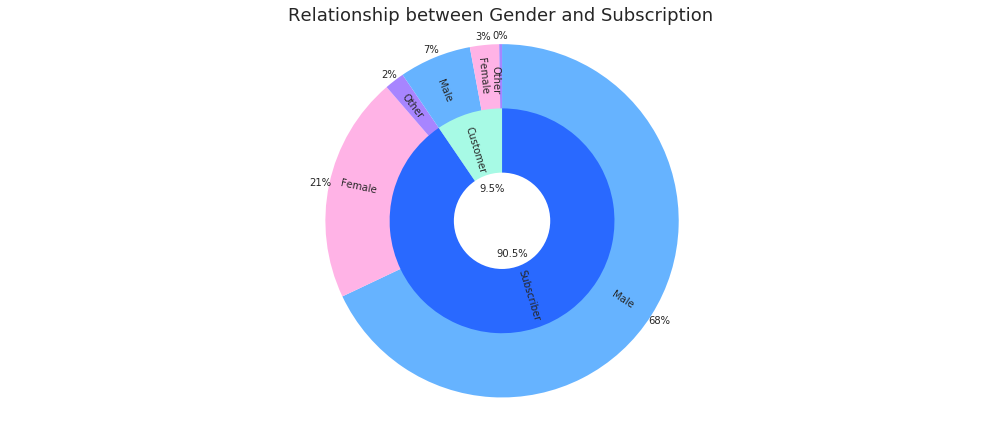

In [37]:
# Value counts for each sub category defined for calculations and visulatization.

sub = df.query('user_type == "Subscriber"').shape[0]
cust = df.query('user_type == "Customer"').shape[0]
m = df.query('member_gender == "Male"').shape[0]
f = df.query('member_gender == "Female"').shape[0]
m_sub = df.query('user_type == "Subscriber" and member_gender == "Male"').shape[0]
f_sub = df.query('user_type == "Subscriber" and member_gender == "Female"').shape[0]
o_sub = df.query('user_type == "Subscriber" and member_gender == "Other"').shape[0]
m_cust = df.query('user_type == "Customer" and member_gender == "Male"').shape[0]
f_cust = df.query('user_type == "Customer" and member_gender == "Female"').shape[0]
o_cust = df.query('user_type == "Customer" and member_gender == "Other"').shape[0]

# x values are defined as "size" and "size_gender".

size =[sub, cust]
size_gender = [m_sub, f_sub, o_sub, m_cust, f_cust, o_cust]

# Labels are defined.

labels = df.user_type.value_counts().index[:2]
labels_gender = ["Male","Female","Other","Male","Female","Other"]

# Colors are choosen for demonstration.

colors = ['#2969ff','#a7fae5']
colors_gender = ['#66b3ff','#ffb3e6', '#a785ff', 
                 '#66b3ff','#ffb3e6', '#a785ff']

# Adjusting the font size
plt.rcParams['font.size'] = 10

# Creating pie charts
fig1, ax1 = plt.subplots(figsize=(14,6))
plt.pie(size_gender, labels = labels_gender, labeldistance=0.72, startangle = 90, counterclock = False, 
        radius=1.1, pctdistance=1.05, autopct='%1.0f%%',rotatelabels=True, colors = colors_gender)

plt.pie(size, labels = labels, labeldistance=0.435, startangle = 90, counterclock = False, 
        radius=0.7, pctdistance=0.3, autopct='%1.1f%%',rotatelabels=True, colors = colors)

# Creating a white circle at the middle of the pie chart to increase visualization.
centre_circle = plt.Circle((0,0),0.3,color='black', fc='white',linewidth=0)

# Sometimes graphes are shown as elips. This will fix it and turn pie chart to a circle.
plt.axis('equal')

# Plotting and labeling
plt.title("Relationship between Gender and Subscription", fontsize = 18)
plt.tight_layout() 
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

# Giving some statistics
print('\033[1m' +"Male Subscribers:"+ '\033[0m',m_sub)
print('\033[1m' +"Female Subscribers:"+ '\033[0m',f_sub)
print('\033[1m' +"Female Subscribers:"+ '\033[0m',o_sub)
print('\033[1m' +"Subscriber Rates:"+ '\033[0m',"M:", m_sub/sub, "F:", f_sub/sub, "O:", o_sub/sub)
print("")
print('\033[1m' +"Male Customer:"+ '\033[0m',m_cust)
print('\033[1m' +"Female Customer:"+ '\033[0m',f_cust)
print('\033[1m' +"Female Subscribers:"+ '\033[0m',o_cust)
print('\033[1m' +"Customer Rates:"+ '\033[0m',"M:", m_cust/cust, "F:", f_cust/cust, "O:", o_cust/cust)
print("")
print('\033[1m' +"Subscription Count/Gender:"+ '\033[0m',"M:", m_sub/m,"F:",f_sub/f)
print('\033[1m' +"Customer Count/Gender:"+ '\033[0m',"M:", m_cust/m,"F:",f_cust/f)

# Saving the figure
fig.savefig('Relationship between Gender and Subscription.png');

* *It can be said that men have higher subscription rate than women according to the results of the pie chart above.*

* *There is a small difference between customer and subscriber category, if we consider the rate of genders for each category. Women tend not to choose memberships compared to men.* 

**Female sub rate: 88.6%**

**Male sub rate: 91.2%**


* **Is there are relationship between subscription and usage time?**

Total Usage Time: S: 28098.9205556 C: 6042.80722222 hours.
Total Usage Rate: S: 0.82300815994 C: 0.17699184006


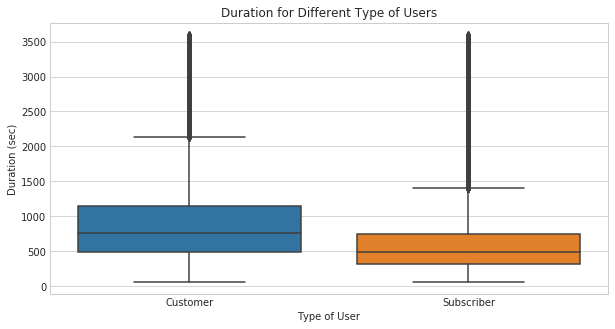

In [38]:
# using boxplot to compare "user_type" by their usage time. Bike trips that is lower than 1 hours is used for demonstration.

# Customer and Subscriber usage durations are calculated for statistics part.
cust_time = df.query('user_type == "Customer"').duration_sec.sum()
sub_time = df.query('user_type == "Subscriber"').duration_sec.sum()

# Plotting and smoothing the labels
sb.boxplot(data=df[df.duration_sec<3600],x='user_type',y='duration_sec')
graph_properties("Type of User","Duration (sec)","Duration for Different Type of Users");

# Extra statisctics information
print('\033[1m' +"Total Usage Time:"+ '\033[0m',"S:", sub_time/3600 , "C:", cust_time/3600,"hours.")
print('\033[1m' +"Total Usage Rate:"+ '\033[0m',"S:", sub_time/(sub_time+cust_time) , "C:", cust_time/(sub_time+cust_time))

* *The usage time per bike ridde is higher for non subscribers.*
* *However Subscribers have more than 4 times total usage duration.*

* **Is the bike ride change of subscribers through days is similar to non subscribers.**

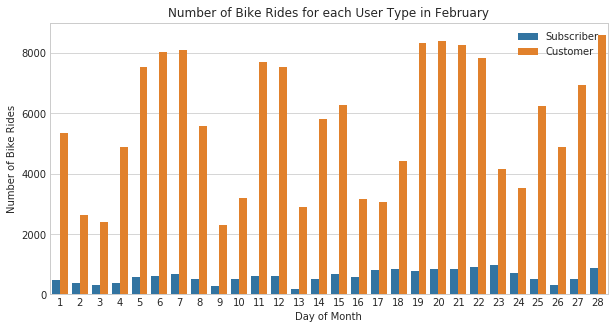

In [39]:
# Plotting, smoothing labels and creating legend
sb.countplot(data=df,x='s_day',hue='user_type')
graph_properties("Day of Month","Number of Bike Rides","Number of Bike Rides for each User Type in February");
plt.legend(labels, loc = "upper right");

* *Similarity in change between subscribers and non subscriber customers cannot be denied but the rate looks different.*
* *Subscribers have some significant drops in specific days.*

* **What is the relationship of user types and weekdays?**

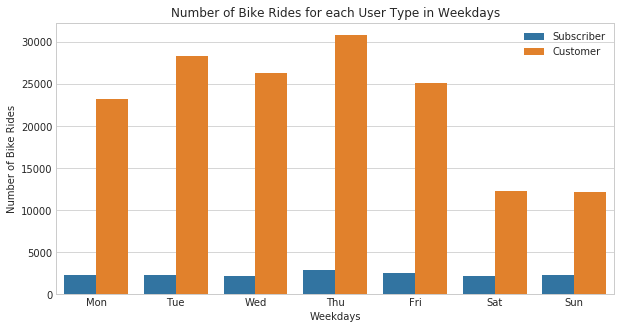

In [40]:
# Defining the dataframe
df_weekly = df
df_weekly['s_weekday_name'] = pd.Categorical(df_weekly['s_weekday_name'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True) 

# Plotting
sb.countplot(data=df_weekly,x='s_weekday_name',hue='user_type')

# Smoothing labels
graph_properties("Weekdays","Number of Bike Rides","Number of Bike Rides for each User Type in Weekdays")

# Creating a legend
plt.legend(labels, loc = "upper right");

* *As it can be seen above, non-subscibers have similar trend over weekdays; however, the change is significantly higher for subscribers.*

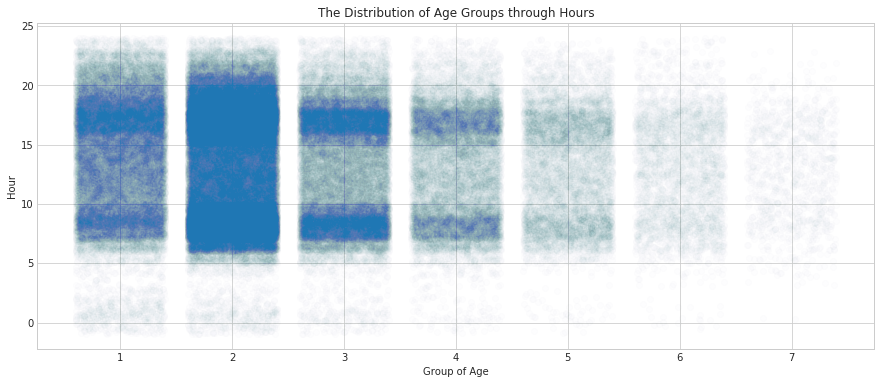

In [41]:
# plotting and empty figure and adjusting the size
plt.figure(figsize = [15,6])

# categorizing ages into 7 group.
dfa_1 = df.query('member_age >18 and member_age<=25')
dfa_1['agegroup'] = 1
dfa_2 = df.query('member_age >26 and member_age<=34')
dfa_2['agegroup'] = 2
dfa_3 = df.query('member_age >35 and member_age<=41')
dfa_3['agegroup'] = 3
dfa_4 = df.query('member_age >42 and member_age<=49')
dfa_4['agegroup'] = 4
dfa_5 = df.query('member_age >50 and member_age<=56')
dfa_5['agegroup'] = 5
dfa_6 = df.query('member_age >57 and member_age<=62')
dfa_6['agegroup'] = 6
dfa_7 = df.query('member_age >63 and member_age<=69')
dfa_7['agegroup'] = 7

# concatenating the 7 group into one dataframe.
df_agegroup = pd.concat([dfa_1, dfa_2, dfa_3, dfa_4, dfa_5, dfa_6, dfa_7],ignore_index=True)

# Creating a visualizing by using jitter and alpha.
sb.regplot(data = df_agegroup, x = 'agegroup', y = 's_hour', fit_reg = False,
           x_jitter = 0.4, y_jitter = 1, scatter_kws = {'alpha' : 1/150})

# Smoothing labels
graph_properties("Group of Age","Hour","The Distribution of Age Groups through Hours");

* *Young people used the Ford BikeGo more oftenly.*
* *In all age categories 8-9 AM and 16-17 PM are peak hours for bike usage.*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscription rate is higher for men compared to women.

> Non-Subscriber's (Customers) usage duration per bike trip higher than the duration of Subscribers.
  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Non-subscriber's usage is almost identical for each weekday. The significant decrease in bicycle trips at weekends is due to subscribed user's behaviour.

## 6.Multivariate Exploration

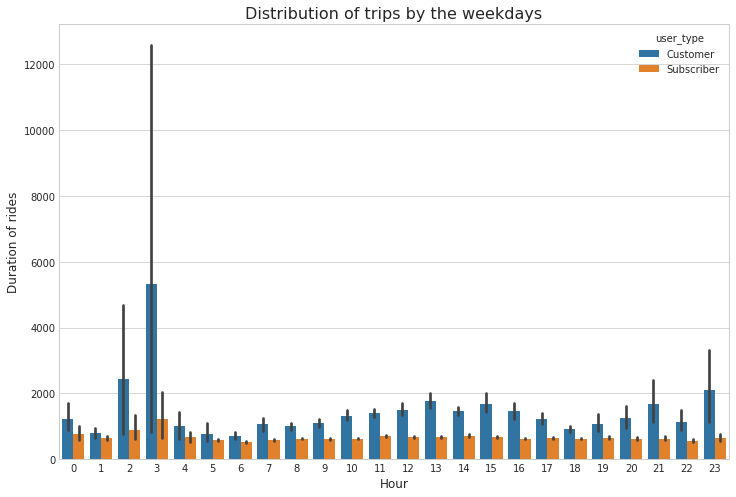

In [42]:
# Creating an empty figure and adjusting the size
plt.figure(figsize=(12, 8))

# Choosing the base colors
base_color = sb.color_palette()[0]

# Creating the chart
sb.barplot(data=df, x='s_hour', y='duration_sec', hue='user_type')

# Labeling
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the weekdays", fontsize=16);

# Saving the image of it
plt.savefig('Distribution of trips by the weekdays.png')

* *There are some bike trips which are started by non-subscribed customers between 2 and 3 February. One of them took more than 3 day.*
* *Non-subscribed customers travel more than subscribed customers. It was a previous finding which is still proven by our results.*

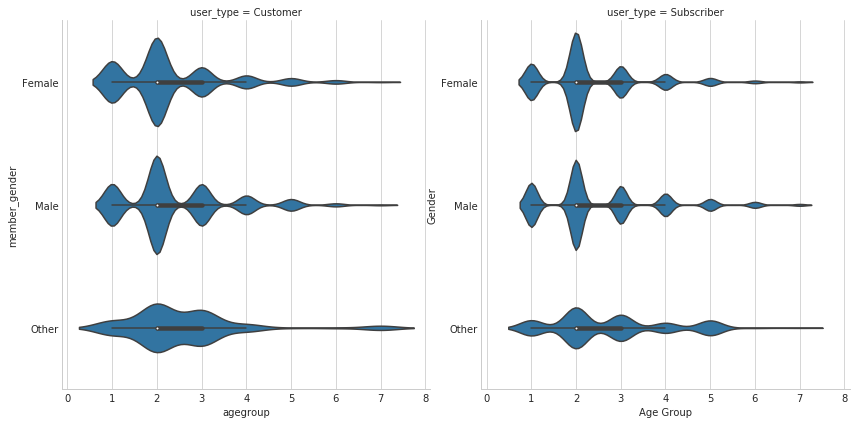

In [43]:
# Faceting plots (User type X Gender X Age Group)
g = sb.FacetGrid(data = df_agegroup , col = 'user_type', size = 6)
g.map(sb.violinplot, 'agegroup', 'member_gender')

# Labeling
plt.ylabel("Gender")
plt.xlabel("Age Group")

# Saving the image as png
plt.savefig('User type X Gender X Age Group.png')

* *Most of the user subscriptions are from the second age group which consist of 27 to 34 years old people.*
* *We same nearly the same pattern for both female and male.*

In [44]:
# Preparing dataframe for Age X Weekdays X Hours heatmap.

df_age1 = df_agegroup.drop(columns=['duration_sec','start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       's_day', 's_month', 's_year','s_month_name','agegroup'])
df_age1['s_weekday_name'] = pd.Categorical(df_age1['s_weekday_name'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True) 
df_age1 = df_age1.pivot_table(index='s_hour', columns='s_weekday_name')


# Preparing dataframe for Age X Gender X Hours heatmap.

df_age2 = df_agegroup.drop(columns=['duration_sec','start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'bike_share_for_all_trip',
       's_day', 's_month', 's_year','s_weekday_name','s_month_name','agegroup'])
df_age2 = df_age2.pivot_table(index='s_hour', columns='member_gender')

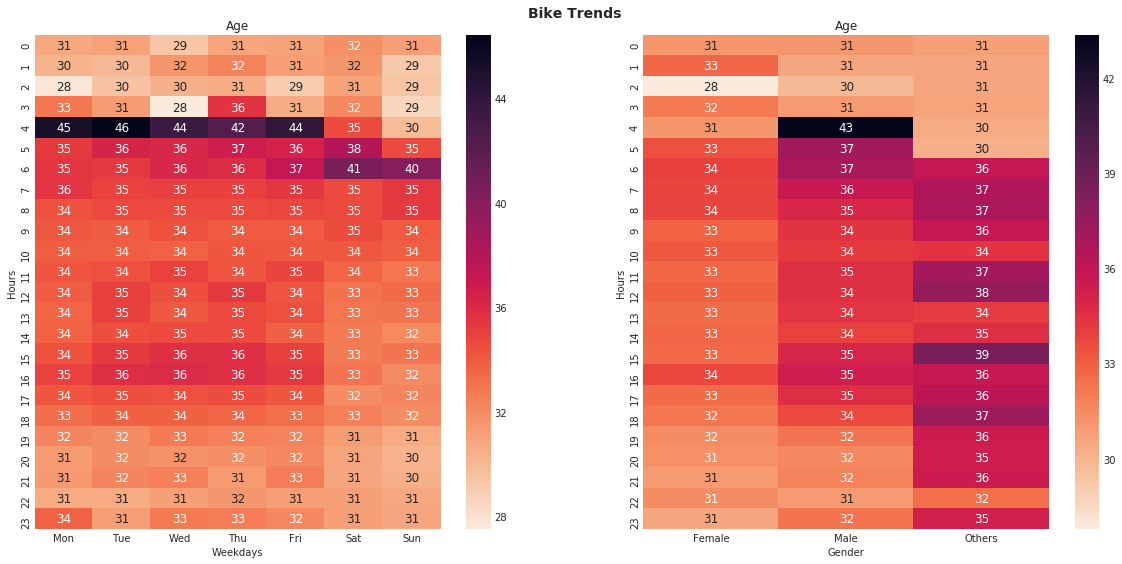

In [45]:
# Creating an empty figure and adjusting the size
plt.figure(figsize=(20,20))

# Creating a subplot and defining the title
plt.subplot(221)
plt.suptitle('Bike Trends', fontsize=14,fontweight='bold', y=0.9)

# Creating the heatmap of the df_age1 dataframe
sb.heatmap(df_age1, annot=True, cmap='rocket_r', annot_kws={"size": 12},xticklabels=('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))

# Smoothing labels
graph_properties("Weekdays","Hours","Age")

# Creating a subplot and defining the title
plt.subplot(222)

# Creating the heatmap of the df_age2 dataframe
sb.heatmap(df_age2, annot=True, cmap='rocket_r', annot_kws={"size": 12},xticklabels=('Female','Male','Others'))

# Smoothing labels
graph_properties("Gender","Hours","Age")

# Saving image as png
plt.savefig('heatmaps.png');

* *42-45 years old people used Ford GoBike at 04:00~05:00 AM. Moreover, these are only on Monday to Friday. These age group shifts to nearly after 06:00 AM on Saturday and Monday*
* *Young people prefer using bikes between 00:00 - 02:00 AM.*
* *Female bike riders are younger than Male bike riders.*

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Non-subscribed customers travel more than subscribed customers. It was a previous finding which is still proven by our results.

>Young people prefer using bikes between 00:00 - 02:00 AM.

>Most of the user subscriptions are from the second age group which consist of 27 to 34 years old people.

### Were there any interesting or surprising interactions between features?

> It was a little bit suprising to find out that 42-45 years old people used Ford GoBike at 04:00~05:00 AM. Moreover, these are only on Monday to Friday. These age group shifts to nearly after 06:00 AM on Saturday and Monday.

>There are some bike trips which are started by non-subscribed customers between 2 and 3 February. One of them took more than 3 day.

## 7.Conclusions

In this project, 2019 February Ford GoBike dataset is examined. Preliminary Wrangling, Cleaning and Visualization is processed sequantially.

Key results of this project are as follows;

* **We point out that bike riders are 34 years old in mean.**

* **Non-subscriber customers are travelling longer than subscribers in one trip.**

* **Males are more likely to bike than females.**

* **Women tend not to choose memberships compared to men.**

* **Market St at 10th St. is intensely used for starting bike rides.**

* **San Francisco Caltrain Station 2 (Townsend St at 4th St) is intensely used for ending bike rides.**

## 8.References

https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html - pandas.Series.dt.strftime

https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas - Splitting timestamp

https://seaborn.pydata.org/examples/index.html - seaborn gallery

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f - pie chart example

https://g.co/kgs/npFTmx - Google color finder

https://seaborn.pydata.org/tutorial/color_palettes.html - Seaborn Color palettes

https://stackoverflow.com/questions/53575689/pandas-groupby-how-to-sort-weekdays-in-the-correct-order-when-creating-groupby - Correcting order of values